### In this notebook we use tensorflow CNN model to find waldo.

In [59]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

from img_gen import create_sample
import cv2

In [60]:
#constants
IMG_SIZE = 64

In [61]:
# # creating waldo images

# create_sample(IMG_SIZE,4017)

In [62]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    '../data/selfmade',
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

print(test_ds.class_names)

Found 9354 files belonging to 2 classes.
Using 7484 files for training.
Using 1870 files for validation.
['notwaldo', 'waldo']


In [63]:
yesset = tf.keras.utils.image_dataset_from_directory(
    '../data/selfmade/',
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

print(yesset.class_names)

Found 9354 files belonging to 2 classes.
['notwaldo', 'waldo']


In [64]:
notset = tf.keras.utils.image_dataset_from_directory(
    '../data/src1/notwaldo',
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

print(notset.class_names)

Found 5337 files belonging to 1 classes.
['notwaldo']


In [65]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Lambda, Resizing
from tensorflow.keras.models import Sequential

def get_conv(input_shape=(IMG_SIZE, IMG_SIZE, 3), filename=None):
    model = Sequential()
    model.add(Lambda(lambda x: x / 127.5 - 1., input_shape=input_shape, output_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', name='conv1', input_shape=input_shape, padding="same"))
    model.add(Conv2D(64, (3, 3), activation='relu', name='conv2', padding="same"))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (8, 8), activation="relu", name="dense1"))
    model.add(Dropout(0.5))
    model.add(Conv2D(2, (14, 14), name="dense2", activation="sigmoid"))
    
    
    model.add(Flatten())
    model.compile(loss='mse', optimizer='adadelta', metrics=['accuracy'])
    return model

In [66]:
from tensorflow.keras.applications import ResNet50

model = get_conv()

model2 = Sequential()
model2.add(Resizing(224,224))
model2.add(ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3)))
model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(2, activation='softmax'))


In [67]:
from collections import Counter

label_counter = Counter()

# Iterate through the dataset
for images, labels in test_ds:
    # Convert the labels to numpy array if they are in tensor format
    labels_np = labels.numpy()
    
    # Update the counter with the labels in the current batch
    label_counter.update(labels_np)

# Print the number of elements for each class
for label, count in label_counter.items():
    print(f"Class {label}: {count} elements")

Class 0: 1104 elements
Class 1: 766 elements


2024-06-09 15:40:50.238494: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1870]
	 [[{{node Placeholder/_4}}]]
2024-06-09 15:40:50.238653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1870]
	 [[{{node Placeholder/_4}}]]


In [68]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# both = yesset.concatenate(train_ds)
model2.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

history = model.fit(train_ds, validation_data=test_ds, epochs=10)
# history2 = model2.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10


2024-06-09 15:40:50.337281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7484]
	 [[{{node Placeholder/_4}}]]
2024-06-09 15:40:50.337497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [7484]
	 [[{{node Placeholder/_0}}]]


234/234 [==============================] - 29s 124ms/step - loss: 0.2521 - accuracy: 0.5502 - val_loss: 0.2479 - val_accuracy: 0.5706
Epoch 2/10
234/234 [==============================] - 32s 137ms/step - loss: 0.2486 - accuracy: 0.5363 - val_loss: 0.2456 - val_accuracy: 0.5583
Epoch 3/10
234/234 [==============================] - 34s 143ms/step - loss: 0.2481 - accuracy: 0.5297 - val_loss: 0.2443 - val_accuracy: 0.5310
Epoch 4/10
234/234 [==============================] - 37s 157ms/step - loss: 0.2468 - accuracy: 0.5183 - val_loss: 0.2432 - val_accuracy: 0.5241
Epoch 5/10
234/234 [==============================] - 33s 142ms/step - loss: 0.2465 - accuracy: 0.5322 - val_loss: 0.2422 - val_accuracy: 0.5262
Epoch 6/10
234/234 [==============================] - 33s 142ms/step - loss: 0.2454 - accuracy: 0.5224 - val_loss: 0.2413 - val_accuracy: 0.5299
Epoch 7/10
234/234 [==============================] - 31s 134ms/step - loss: 0.2453 - accuracy: 0.5226 - val_loss: 0.2403 - val_accuracy: 0.5

In [69]:
# Unbatch and batch the dataset to get all data at once
train_images, train_labels = next(iter(train_ds.unbatch().batch(len(train_ds))))
test_images, test_labels = next(iter(test_ds.unbatch().batch(len(test_ds))))

# Predict on the training data
train_predictions = model.predict(train_images)
train_predicted_labels = tf.argmax(train_predictions, axis=1)

# Ensure the labels are of the same type
train_predicted_labels = tf.cast(train_predicted_labels, tf.int32)

# Calculate the number of correct predictions
correct_predictions = tf.reduce_sum(tf.cast(train_predicted_labels == train_labels, tf.int32))

# Calculate accuracy
accuracy = correct_predictions / len(train_labels)

print(f"Manual checking accuracy on training data: {accuracy * 100:.2f}%")


1/8 [==>...........................] - ETA: 0s

2024-06-09 15:46:26.360600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7484]
	 [[{{node Placeholder/_4}}]]
2024-06-09 15:46:26.360838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7484]
	 [[{{node Placeholder/_4}}]]
2024-06-09 15:46:26.425446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1870]


8/8 [==============================] - 0s 32ms/step
Manual checking accuracy on training data: 55.13%


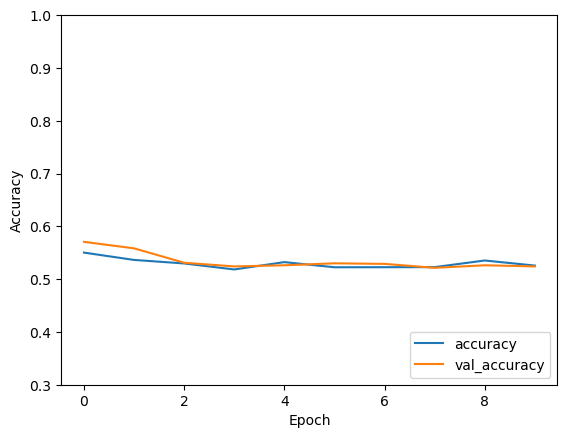

In [70]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')


In [71]:
ds = train_ds
true_labels = np.concatenate([y for x, y in ds], axis=0)
predictions = model.predict(ds)
predictions = np.argmax(predictions, axis=1)
counter=0
for true, pred in zip(true_labels, predictions):
    if true==pred:
        counter+=1
    # print(f"True: {true}, Predicted: {pred}")
print(counter/len(true_labels))

234/234 [==============================] - 8s 33ms/step
0.48810796365579906


In [72]:
import os
directory_path = f'../data/src1/{IMG_SIZE}'
pref = "6_"
filenames = [(f,'waldo') for f in os.listdir(directory_path+'/waldo') if f.startswith(pref)]+[(f, 'notwaldo') for f in os.listdir(directory_path+'/notwaldo') if f.startswith(pref)]
filenames.sort()
filenames

[('6_0_0.jpg', 'notwaldo'),
 ('6_0_1.jpg', 'notwaldo'),
 ('6_0_10.jpg', 'notwaldo'),
 ('6_0_11.jpg', 'notwaldo'),
 ('6_0_12.jpg', 'notwaldo'),
 ('6_0_13.jpg', 'notwaldo'),
 ('6_0_14.jpg', 'notwaldo'),
 ('6_0_15.jpg', 'notwaldo'),
 ('6_0_2.jpg', 'notwaldo'),
 ('6_0_3.jpg', 'notwaldo'),
 ('6_0_4.jpg', 'notwaldo'),
 ('6_0_5.jpg', 'notwaldo'),
 ('6_0_6.jpg', 'notwaldo'),
 ('6_0_7.jpg', 'notwaldo'),
 ('6_0_8.jpg', 'notwaldo'),
 ('6_0_9.jpg', 'notwaldo'),
 ('6_10_0.jpg', 'notwaldo'),
 ('6_10_1.jpg', 'notwaldo'),
 ('6_10_10.jpg', 'notwaldo'),
 ('6_10_11.jpg', 'notwaldo'),
 ('6_10_12.jpg', 'notwaldo'),
 ('6_10_13.jpg', 'notwaldo'),
 ('6_10_14.jpg', 'notwaldo'),
 ('6_10_15.jpg', 'notwaldo'),
 ('6_10_2.jpg', 'notwaldo'),
 ('6_10_3.jpg', 'notwaldo'),
 ('6_10_4.jpg', 'notwaldo'),
 ('6_10_5.jpg', 'notwaldo'),
 ('6_10_6.jpg', 'notwaldo'),
 ('6_10_7.jpg', 'notwaldo'),
 ('6_10_8.jpg', 'notwaldo'),
 ('6_10_9.jpg', 'notwaldo'),
 ('6_11_0.jpg', 'notwaldo'),
 ('6_11_1.jpg', 'notwaldo'),
 ('6_11_10.jpg', '

In [73]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tqdm import tqdm

correct=0
incorrect=0
incorrect_files=[]
correct_files=[]
# print(filenames)
for fname, true in tqdm(filenames):
    img = image.load_img(f'../data/src1/{IMG_SIZE}/{true}/{fname}', target_size=(IMG_SIZE, IMG_SIZE, 3))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    
    # Predict the class
    prediction = model.predict(img_array, verbose =0)
    predicted_class = 'waldo' if prediction[0][0] < prediction[0][1] else 'notwaldo'
    # if true == 'notwaldo':
        # print(true, prediction)
    
    # Print the prediction
    if predicted_class==true:
        correct += 1
        correct_files+=[f'../data/src1/{IMG_SIZE}/{true}/{fname}']
    else:
        incorrect_files+=[f'../data/src1/{IMG_SIZE}/{true}/{fname}']
        incorrect += 1
    # print(f'Predicted class: {predicted_class} with {prediction[0]}\t{"CORRECT" if predicted_class == True else "INCORRECT"}')
    
    # Optionally, display the image
    # plt.imshow(img)
    # plt.title(f'Predicted: {predicted_class}')
    # plt.show()
print(correct, incorrect)


100%|██████████| 256/256 [00:10<00:00, 25.50it/s]

132 124


In [74]:
counter =0
for f in correct_files:
    if f.startswith(f'../data/src1/{IMG_SIZE}/waldo'):
        counter+=1
counter2 =0
for f in incorrect_files:
    if f.startswith(f'../data/src1/{IMG_SIZE}/waldo'):
        counter2+=1 

print("Waldo correct: ",counter, " incorrect: ", counter2)

counter =0
for f in correct_files:
    if f.startswith(f'../data/src1/{IMG_SIZE}/notwaldo'):
        counter+=1
counter2 =0
for f in incorrect_files:
    if f.startswith(f'../data/src1/{IMG_SIZE}/notwaldo'):
        counter2+=1 

print("Notwaldo correct: ",counter, " incorrect: ", counter2) 

Waldo correct:  0  incorrect:  1
Notwaldo correct:  132  incorrect:  123
